# Name: Muzaffar Ahmed

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score,auc,roc_curve
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv('DS_dataset.csv')

In [ ]:
data.head()

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,41.534,12.123,G1,C1,Bronze,0
1,40515,9.445,0.256,G1,C1,Bronze,0
2,52697,37.599,3.199,G1,C2,Gold,0
3,68202,81.514,1.645,G1,C1,Silver,0
4,130003,46.805,1.706,G1,C1,Silver,0


In [ ]:
data.shape

(30829, 7)

There are 30829 data points and 7 Features.

There are 6 independent features and 1 Dependent Feature.

This is a Binary Classification problem to predict whether customer purchase ABC product or not.

Class 0 means customer didn't purchased product.

Class 1 means customer purchased product.

In [ ]:
data['Purchased_ABC_product'].value_counts()

1    15524
0    15305
Name: Purchased_ABC_product, dtype: int64

Text(0.5, 1.0, 'Count of each class')

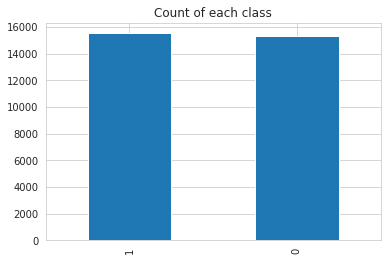

In [ ]:
data['Purchased_ABC_product'].value_counts().plot(kind='bar')
plt.title('Count of each class')

This is well balanced dataset 

## Missing Values

In [ ]:
data.isnull().sum().sum()

0

There are no missing Values in the dataset


## duplicate values

In [ ]:
data.duplicated().sum()

0

No duplicate rows

In [ ]:
#Dropping irrelevant column 'Customer ID'
new_data=data.drop('Customer_ID',axis=1)

# Univariate Analysis of Var1 and Var2


In [ ]:
new_data.describe()

,Var1,Var2,Purchased_ABC_product
count,30829.000000,30829.000000,30829.000000
mean,64.868318,4.994489,0.503552
std,114.373345,9.533546,0.499995
min,0.251000,0.000000,0.000000
25%,13.256000,0.668000,0.000000
50%,31.860000,2.189000,1.000000
75%,68.702000,5.482000,1.000000
max,2909.776000,317.380000,1.000000


Mean of Var1 is 64.86. Median of Var1 is 31.86.

Max value is 2909 suggesting there can be outliers in our dataset.

Mean and Median of Var2 is 4.994 and 2.189.Max value is 317 indicating that there can be outliers in Var2

**Box plot of Var1**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot of Var1')

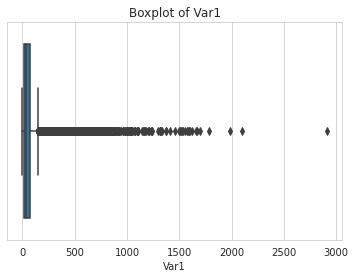

In [ ]:
sns.boxplot(new_data['Var1'])
plt.title('Boxplot of Var1')

Text(0.5, 1.0, 'Scatter plot of Var1')

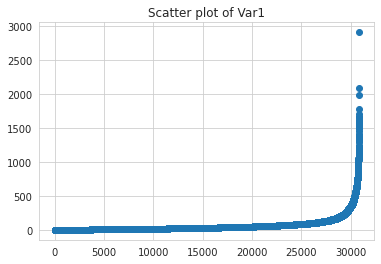

In [ ]:
var1=list(new_data['Var1'])
var1.sort()
plt.scatter(range(data.shape[0]),var1)
plt.title('Scatter plot of Var1')

From above plot we can see that there is one outlier close to 3000

In [ ]:
print(sorted(var1,reverse=True))

[2909.776, 2094.866, 1988.04, 1784.045, 1700.4189999999999, 1668.433, 1664.339, 1621.965, 1601.486, 1594.592, 1578.484, 1569.785, 1558.767, 1532.582, 1522.19, 1518.08, 1504.783, 1494.307, 1454.8039999999999, 1408.964, 1376.889, 1371.604, 1337.036, 1325.54, 1320.0610000000001, 1318.773, 1314.277, 1291.782, 1240.178, 1237.822, 1228.752, 1214.902, 1208.989, 1203.617, 1178.171, 1167.445, 1166.8139999999999, 1163.612, 1153.1789999999999, 1146.8110000000001, 1107.897, 1107.603, 1104.941, 1101.3039999999999, 1098.9189999999999, 1097.849, 1080.232, 1078.76, 1065.897, 1048.694, 1047.322, 1046.006, 1045.739, 1043.6989999999998, 1039.883, 1038.5919999999999, 1038.111, 1027.164, 1023.905, 1018.29, 1017.497, 1016.5260000000001, 1008.5310000000001, 1002.18, 1001.191, 998.303, 997.193, 995.8810000000001, 995.306, 987.222, 981.663, 976.6310000000001, 973.283, 960.432, 960.429, 959.3910000000001, 941.5010000000001, 937.809, 924.311, 922.796, 921.065, 917.431, 916.7180000000001, 916.578, 915.48399999999

**Dropping the outlier point from our Dataset, as it can effect our model badly.**

In [ ]:
new_data.drop(new_data[new_data['Var1']==2909.776].index,axis=0,inplace=True)

**Distribution plot of Var1**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of Var1')

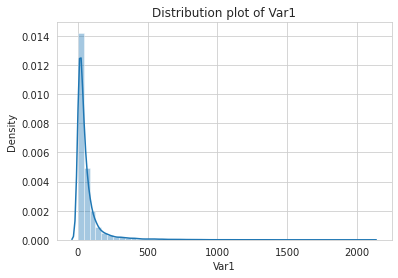

In [ ]:
sns.distplot(new_data['Var1'])
plt.title('Distribution plot of Var1')

From above plot, we can see that most of the Var1 values lies in range of 0 to 500.

**Box plot of Var2**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot of Var2')

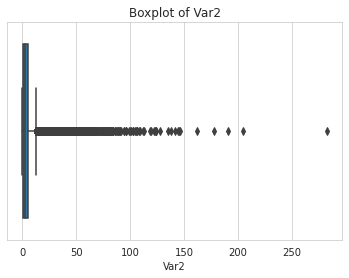

In [ ]:
sns.boxplot(new_data['Var2'])
plt.title('Boxplot of Var2')

In [ ]:
var2=list(new_data['Var2'])
var2.sort(reverse=True)
print(var2)

[282.688, 204.99900000000002, 190.87599999999998, 178.06400000000002, 161.761, 146.085, 145.20600000000002, 144.295, 141.33700000000002, 138.116, 134.769, 127.72200000000001, 124.435, 123.931, 123.494, 122.195, 119.355, 118.314, 113.02799999999999, 112.184, 108.806, 108.014, 106.71, 106.20200000000001, 105.39299999999999, 104.685, 102.93299999999999, 102.926, 102.459, 101.182, 100.33, 99.249, 96.428, 96.109, 96.068, 94.26799999999999, 93.93700000000001, 91.15100000000001, 90.913, 90.596, 89.87100000000001, 88.88600000000001, 88.84, 88.34, 87.775, 86.598, 86.14, 85.91799999999999, 84.11200000000001, 83.81, 83.76700000000001, 83.751, 83.647, 83.62299999999999, 82.64399999999999, 82.28, 82.046, 81.312, 81.154, 81.102, 80.942, 80.818, 80.163, 80.081, 80.033, 79.98899999999999, 79.874, 79.616, 79.579, 79.33, 79.074, 79.014, 78.689, 78.687, 78.54, 77.686, 77.398, 77.025, 76.933, 75.829, 75.797, 75.71600000000001, 74.858, 74.775, 74.46, 74.335, 73.967, 73.725, 73.675, 73.655, 73.453, 73.16199

We can see that there is outlier with point of Var2=282.

Dropping that outlier

In [ ]:
new_data.drop(new_data[new_data['Var2']==282.688].index,axis=0,inplace=True)

**Distribution plot of Var2**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


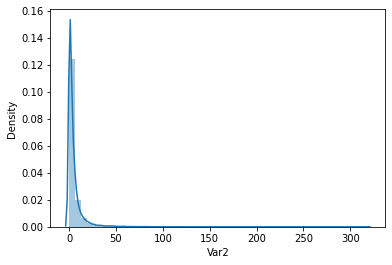

In [ ]:
sns.distplot(new_data['Var2'])

Most of the points of Var2 lies between 0 to 50

**Creating Dataset for both classes**

In [ ]:
data_not_buy=new_data.loc[new_data['Purchased_ABC_product']==0] #Dataset of customers who didn't purchase ABC product
data_buy=new_data.loc[new_data['Purchased_ABC_product']==1] #Dataset of customers who purchased products

In [ ]:
data_buy.describe()

,Var1,Var2,Purchased_ABC_product
count,15524.000000,15524.000000,15524.0
mean,100.812371,8.308800,1.0
std,149.083104,12.307501,0.0
min,0.797000,0.023000,1.0
25%,26.586250,2.235750,1.0
50%,54.709500,4.616500,1.0
75%,109.149000,9.250250,1.0
max,2909.776000,317.380000,1.0


In [ ]:
data_not_buy.describe()

,Var1,Var2,Purchased_ABC_product
count,15305.000000,15305.000000,15305.0
mean,28.409939,1.632754,0.0
std,34.159940,2.645151,0.0
min,0.251000,0.000000,0.0
25%,7.884000,0.000000,0.0
50%,18.034000,0.901000,0.0
75%,36.742000,2.107000,0.0
max,1038.111000,66.502000,0.0


From above we can see that customers who  purchased ABC product have mean and max value of Var1 and Var2 greater than customers who didn't purchased products.



In [ ]:

print('Quantiles of Var1 for customers who purchased products is ',np.percentile(data_buy['Var1'],np.arange(0,100,25)))
print('Quantiles of Var1  for customers who dont purchased products is ',np.percentile(data_not_buy['Var1'],np.arange(0,100,25)))

Quantiles of Var1 for customers who purchased products is  [  0.797    26.58625  54.7095  109.149  ]
Quantiles of Var1  for customers who dont purchased products is  [ 0.251  7.884 18.034 36.742]


**Box plot of Var1 with respect to classes**

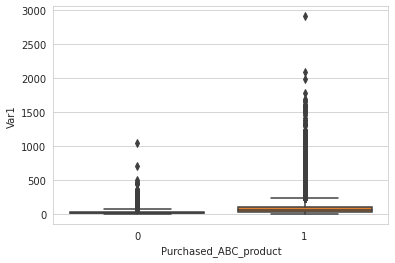

In [ ]:
sns.boxplot(x='Purchased_ABC_product',y='Var1',data=new_data)

Quantiles of Var1 of customers who purchased is greater than quantiles of customers who didn't purchased products.

In [ ]:
print('Quantiles of Var2 for customers who purchased products is ',np.percentile(data_buy['Var2'],np.arange(0,100,25)))
print('Quantiles of Var2  for customers who dont purchased products is ',np.percentile(data_not_buy['Var2'],np.arange(0,100,25)))

Quantiles of Var2 for customers who purchased products is  [0.023   2.23575 4.6165  9.25025]
Quantiles of Var2  for customers who dont purchased products is  [0.    0.    0.901 2.107]


**Box plot of Var1 with respect to classes**

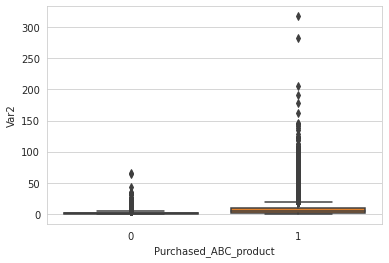

In [ ]:
sns.boxplot(x='Purchased_ABC_product',y='Var2',data=new_data)

Quantiles of Var1 of customers who purchased is greater than quantiles of customers who didn't purchased products.

**Distribution plot of Var1 with respect to classes**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


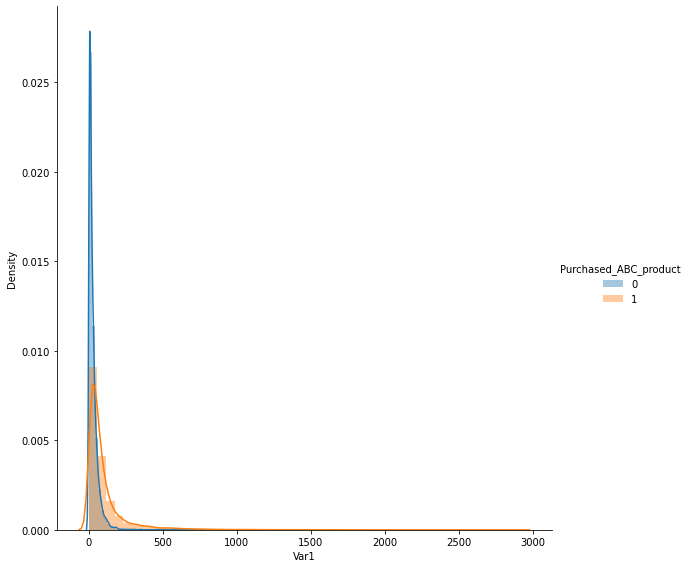

In [ ]:
sns.FacetGrid(new_data, hue='Purchased_ABC_product',size=8)\
   .map(sns.distplot,'Var1')\
   .add_legend()

Distribution of Var1 are not well separated for both classes.

**Distribution plot of Var2 with respect to Classes**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


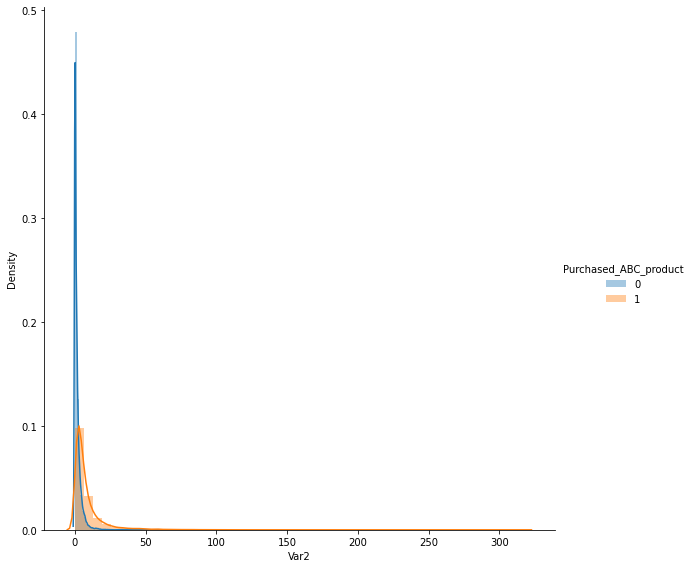

In [ ]:
sns.FacetGrid(new_data, hue='Purchased_ABC_product',size=8)\
   .map(sns.distplot,'Var2')\
   .add_legend()

Distribution of Var2 are not well separated for both classes.

**CDF and PDF plot for Var1 of both classes**

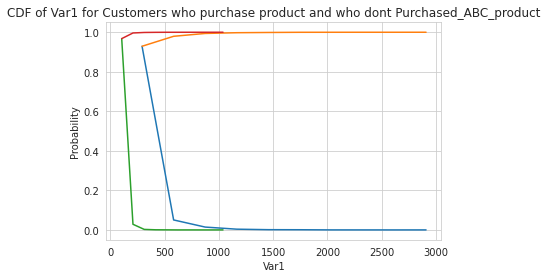

In [ ]:
sns.set_style('whitegrid')
count,bin_edges=np.histogram(data_buy['Var1'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
count,bin_edges=np.histogram(data_not_buy['Var1'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,)
plt.plot(bin_edges[1:],cdf)
plt.title('CDF of Var1 for Customers who purchase product and who dont Purchased_ABC_product')
plt.xlabel('Var1')
plt.ylabel('Probability')
plt.show()

90% of customers who purchased products have Var1 less than or equal to 250.

95 % of customers who didn't purchase ABC product have variance1 less than 100.

CDF distribution of Var1 are well separated for both classes.

We can say that customers who purchase ABC product will have Var1 greater than 250 and customers who didn't purchased ABC product will have Var1 less than 250

**CDF and PDF plot for Var2 of both classes**

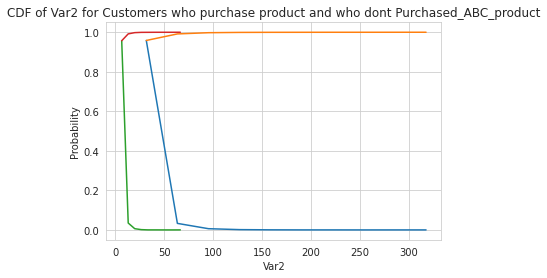

In [ ]:
sns.set_style('whitegrid')
count,bin_edges=np.histogram(data_buy['Var2'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
count,bin_edges=np.histogram(data_not_buy['Var2'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,)
plt.plot(bin_edges[1:],cdf)
plt.title('CDF of Var2 for Customers who purchase product and who dont Purchased_ABC_product')
plt.xlabel('Var2')
plt.ylabel('Probability')
plt.show()

90% of customers who didn't purchased ABC product have variance2 less than or equal to 20.

90% of customers who purchased ABC products have Var2 less than or equal to 40.

We can roughly estimate that Customer who purchased product have Var2 greater than 40 and customers who didn't purchased products have var2 less than 40

**Pairplot between Var1 and Var2**

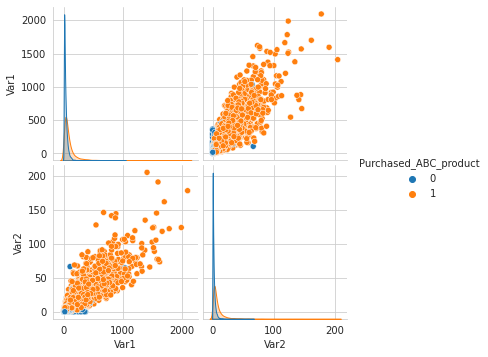

In [ ]:
sns.pairplot(data=new_data,hue='Purchased_ABC_product')


From above figure, we can conclude that customers who didn't purchased ABC product will have low value of Var1 and Var2.

For the customers who  purchased product will have high value of Var1 and Var2

**Correlation Matrix**

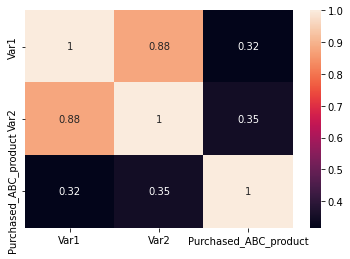

In [ ]:
sns.heatmap(new_data.corr(),annot=True)

There is strong correlation between Var1 and Var2.
 
 There is a bit of strong correlation between Var2 and Dependent variable compared to Var1 and Dependent Variable.

 As there is a strong correlation between Var1 and Var2, we can drop one of the feature for better performance.

# Analysis of Group,Rating and Category Feature

In [ ]:
new_data.head()

,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,41.534,12.123,G1,C1,Bronze,0
1,9.445,0.256,G1,C1,Bronze,0
2,37.599,3.199,G1,C2,Gold,0
3,81.514,1.645,G1,C1,Silver,0
4,46.805,1.706,G1,C1,Silver,0


## Group Feature

In [ ]:
data['Group'].value_counts()

G1    19365
G5     8558
G3     1762
G4      494
G6      312
G2      298
G7       21
G8       19
Name: Group, dtype: int64

**Count plot of each category of Group Feature**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


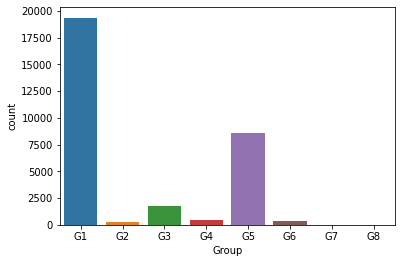

In [ ]:
sns.countplot(new_data['Group'])

From above we can see that G1 and G5 are dominant categories.
Categories are distributed in imbalance fashion.

**Count plot of categories of Group Feature with respect to Classes**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


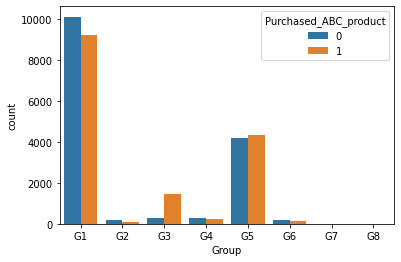

In [ ]:
sns.countplot('Group',hue='Purchased_ABC_product',data=data)

All the categories are well distributed with respect to classes except G3.

We can see that customers who are having G3 category tends to purchase the product.

## Category feature

In [ ]:
data['Category'].value_counts()

C1    14934
C3     6707
C2     4031
C5     2993
C4     2164
Name: Category, dtype: int64

**Count plot of each category of category feature**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


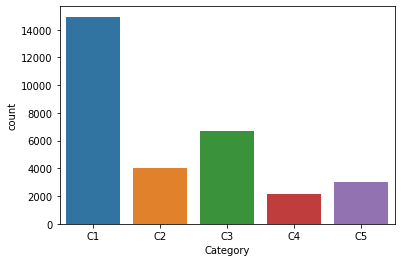

In [ ]:
sns.countplot(new_data['Category'])

From above plot, we can see that C1 and C3 categories are dominant .

**Count plot of Category feature with respect to class**

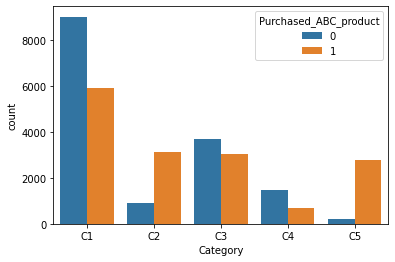

In [ ]:
sns.countplot(x='Category',hue='Purchased_ABC_product',data=new_data)

From above plot, we can make following conclusions.
1. If the customer is of category C1,C3 and C4, then customer probably will not purchase the product.
2. If the customer is of category C2 and C5, then customer tends to buy the product.

# Rating

In [ ]:
new_data['Rating'].value_counts()

Bronze    15127
Silver    10171
Gold       5529
Name: Rating, dtype: int64

**Count plot of Rating Feature**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


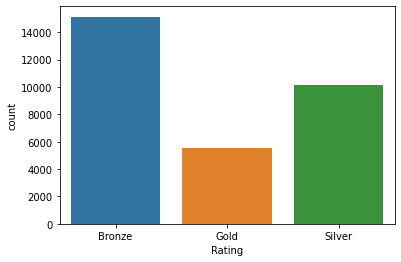

In [ ]:
sns.countplot('Rating',data=new_data)

Bronze and Silver Rating are dominant categories in Rating Feature.

**Count plot of Rating Feature with respect to Class**

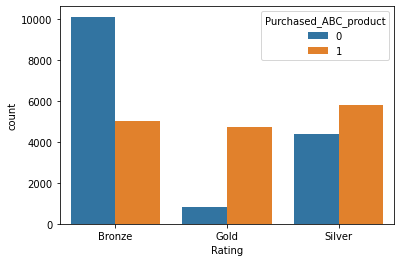

In [ ]:
sns.countplot(x='Rating',hue='Purchased_ABC_product',data=new_data)

1. If a customer is having Bronze rating, customer probably will not buy the product.
2. If a customer is having Gold or Silver rating, customer tends to buy the product.

# Splitting Dataset

In [ ]:
X=new_data.drop('Purchased_ABC_product',axis=1)
y=new_data['Purchased_ABC_product']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

# Categorical Encoding

One hot encoding for Category and Group Feature.

Ordinal Encoding for Rating Feature

In [ ]:
X_train['Rating']=X_train['Rating'].replace({"Gold":1,"Silver":2,"Bronze":3})
X_test["Rating"]=X_test["Rating"].replace({"Gold":1,"Silver":2,"Bronze":3})

In [ ]:
one_hot_encoder=OneHotEncoder()
one_hot_train_results=one_hot_encoder.fit_transform(X_train[['Category','Group']])
one_hot_test_results=one_hot_encoder.transform(X_test[['Category','Group']])
categories=list(one_hot_encoder.categories_[0])+list(one_hot_encoder.categories_[1])
one_hot_train_df=pd.DataFrame(one_hot_train_results.toarray(),columns=categories)
one_hot_test_df=pd.DataFrame(one_hot_test_results.toarray(),columns=categories)

In [ ]:
X_train=pd.concat([X_train,one_hot_train_df],axis=1)
X_test=pd.concat([X_test,one_hot_test_df],axis=1)

In [ ]:
X_train.drop(labels=['Group','Category'],axis=1,inplace=True)
X_test.drop(labels=['Group','Category'],axis=1,inplace=True)

# Feature scaling

In [ ]:
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

# Modelling

# Logistic Regression

In [ ]:
classifier=LogisticRegression()
params={'C':[100, 10, 1.0, 0.1, 0.01]}
clf=GridSearchCV(classifier,params,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(X_train_sc,y_train)
print(clf.best_params_)


{'C': 100}


In [ ]:
classifier=LogisticRegression(C=100)
classifier.fit(X_train_sc,y_train)
y_pred_proba=classifier.predict_proba(X_test_sc)[:,1]
y_pred=classifier.predict(X_test_sc)
auc_logistic = roc_auc_score(y_test,y_pred_proba)
confusion_matrix_logistic=confusion_matrix(y_test,y_pred)
accuracy_logistic=accuracy_score(y_test,y_pred)
print("AUC score for test of Logistic Regression is ",auc_logistic)
print("Accuracy of logistic Regression is ",accuracy_logistic)
print("Confusion Matrix is ")
print(confusion_matrix_logistic)



AUC score for test of Logistic Regression is  0.8352973174017733
Accuracy of logistic Regression is  0.7379176127148881
Confusion Matrix is 
[[2532  529]
 [1087 2018]]


1. AUC score acheived by logistic regression is 0.835297
2. Accuracy acheived is 73.79 %
3. False postive is 529 and False Negative is 1087
4. True positive is 2018 and True Negative is 2532

**As var1 and var2 are highly correlated ,let us check model performance by dropping Var1**

In [ ]:
X_train_drop=X_train.drop(labels='Var1',axis=1)
X_test_drop=X_test.drop(labels='Var1',axis=1)

In [ ]:
scaler=StandardScaler()
X_train_drop_sc=scaler.fit_transform(X_train_drop)
X_test_drop_sc=scaler.transform(X_test_drop)

# Naive Bayes

In [ ]:
params = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
classifier=MultinomialNB(class_prior=[0.5,0.5])
clf=GridSearchCV(classifier,params,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(X_train,y_train)
print(clf.best_params_)


{'alpha': 10}


In [ ]:
classifier=MultinomialNB(class_prior=[0.5,0.5],alpha=10)
classifier.fit(X_train,y_train)
y_pred_proba=classifier.predict_proba(X_test)[:,1]
y_pred=classifier.predict(X_test)
auc_NB= roc_auc_score(y_test,y_pred_proba)
confusion_matrix_NB=confusion_matrix(y_test,y_pred)
accuracy_NB=accuracy_score(y_test,y_pred)
print("AUC score for test of Naive bayesis ",auc_NB)
print("Accuracy of Naive bayes is ",accuracy_NB)
print("Confusion Matrix is ")
print(confusion_matrix_NB)



AUC score for test of Naive bayesis  0.7901870238063298
Accuracy of Naive bayes is  0.7048329549140447
Confusion Matrix is 
[[2565  496]
 [1324 1781]]


# Decision Tree

In [ ]:
params = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5,10,100,500]}
classifier=DecisionTreeClassifier()
clf=GridSearchCV(classifier,params,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'max_depth': 5, 'min_samples_split': 100}


In [ ]:
classifier=DecisionTreeClassifier(max_depth=5,min_samples_split=100)
classifier.fit(X_train,y_train)
y_pred_proba=classifier.predict_proba(X_test)[:,1]
y_pred=classifier.predict(X_test)
auc_dt= roc_auc_score(y_test,y_pred_proba)
confusion_matrix_dt=confusion_matrix(y_test,y_pred)
accuracy_dt=accuracy_score(y_test,y_pred)
print("AUC score for test of decision tree is ",auc_dt)
print("Accuracy of decision tree is ",accuracy_dt)
print("Confusion Matrix is ")
print(confusion_matrix_dt)

AUC score for test of decision tree is  0.8438617146470504
Accuracy of decision tree is  0.7479727538112229
Confusion Matrix is 
[[2232  829]
 [ 725 2380]]


# Random Forest

In [ ]:
params = {'n_estimators':[10,100,1000]}
classifier=RandomForestClassifier()
clf=GridSearchCV(classifier,params,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'n_estimators': 1000}


In [ ]:
classifier=RandomForestClassifier(n_estimators=1000)
classifier.fit(X_train,y_train)
y_pred_proba=classifier.predict_proba(X_test)[:,1]
y_pred=classifier.predict(X_test)
auc_rf= roc_auc_score(y_test,y_pred_proba)
confusion_matrix_rf=confusion_matrix(y_test,y_pred)
accuracy_rf=accuracy_score(y_test,y_pred)
print("AUC score for test of Random Forest is ",auc_rf)
print("Accuracy of Random Forest is ",accuracy_rf)
print("Confusion Matrix is ")
print(confusion_matrix_rf)

AUC score for test of Random Forest is  0.8290526340154907
Accuracy of Random Forest is  0.7309438858254946
Confusion Matrix is 
[[2150  911]
 [ 748 2357]]


# Feature Importance

In [ ]:
importance=classifier.feature_importances_
features=X_train.columns
feat_importance=pd.DataFrame({'features':features,'feat_importance':importance})
feat_importance.sort_values(by='feat_importance',ascending=False,inplace=True)

**Feature importance plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


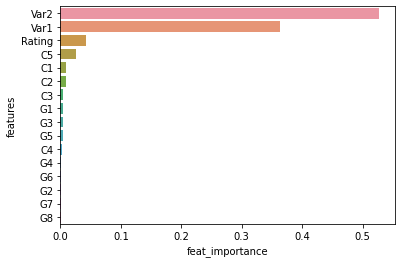

In [ ]:
sns.barplot(feat_importance['feat_importance'],feat_importance['features'])

From above plot, we can see that most important features are Var2 ,Var1,Rating, C5,C1,C2

# XGBoost

In [ ]:
params = {'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],'n_estimators':[5,10,50, 75, 100]}
classifier=XGBClassifier()
clf=GridSearchCV(classifier,params,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.2, 'n_estimators': 75}


In [ ]:
classifier=XGBClassifier(n_estimators=75,learning_rate=0.2)
classifier.fit(X_train,y_train)
y_pred_proba=classifier.predict_proba(X_test)[:,1]
y_pred=classifier.predict(X_test)
auc_xg= roc_auc_score(y_test,y_pred_proba)
confusion_matrix_xg=confusion_matrix(y_test,y_pred)
accuracy_xg=accuracy_score(y_test,y_pred)
print("AUC score for test of XGboost is ",auc_xg)
print("Accuracy of Xgboost is ",accuracy_xg)
print("Confusion Matrix is ")
print(confusion_matrix_xg)

AUC score for test of XGboost is  0.8532471522415133
Accuracy of Xgboost is  0.7526759649691859
Confusion Matrix is 
[[2126  935]
 [ 590 2515]]


**Probabilities of Classes for train dataset**

In [ ]:
print('Predicted probabilities of Class0 and Class 1 for all training points')
print(classifier.predict_proba(X_train))

Streaming output truncated to the last 5000 lines.
 [6.49143457e-01 3.50856543e-01]
 [7.22483397e-02 9.27751660e-01]
 [3.11968863e-01 6.88031137e-01]
 [1.90615773e-01 8.09384227e-01]
 [7.31030703e-01 2.68969268e-01]
 [1.64730847e-01 8.35269153e-01]
 [9.99620378e-01 3.79617530e-04]
 [9.99590218e-01 4.09788132e-04]
 [2.09113181e-01 7.90886819e-01]
 [9.99766469e-01 2.33534985e-04]
 [2.56680727e-01 7.43319273e-01]
 [6.93094075e-01 3.06905925e-01]
 [9.93488908e-01 6.51108008e-03]
 [2.61156797e-01 7.38843203e-01]
 [9.99499023e-01 5.00972965e-04]
 [9.99567747e-01 4.32262517e-04]
 [3.98030221e-01 6.01969779e-01]
 [6.05340481e-01 3.94659519e-01]
 [9.78278399e-01 2.17216127e-02]
 [9.93488908e-01 6.51108008e-03]
 [9.99766469e-01 2.33534985e-04]
 [6.74577355e-01 3.25422674e-01]
 [6.28322423e-01 3.71677577e-01]
 [4.64854836e-01 5.35145164e-01]
 [8.37735653e-01 1.62264362e-01]
 [3.65558863e-01 6.34441137e-01]
 [1.38520360e-01 8.61479640e-01]
 [4.48919475e-01 5.51080525e-01]
 [4.58133876e-01 5.418661

**Probabilities of Classes for test dataset**

In [ ]:
print('Predicted probabilities of Class0 and Class 1 for all test points')
print(classifier.predict_proba(X_test))

Predicted probabilities of Class0 and Class 1 for all test points
[[9.99686956e-01 3.13049473e-04]
 [9.96142805e-01 3.85721936e-03]
 [5.44703364e-01 4.55296665e-01]
 [3.59284282e-01 6.40715718e-01]
 [8.69626999e-02 9.13037300e-01]
 [1.25698507e-01 8.74301493e-01]
 [3.18014443e-01 6.81985557e-01]
 [6.61403894e-01 3.38596106e-01]
 [9.99553680e-01 4.46290040e-04]
 [8.26197863e-03 9.91738021e-01]
 [6.75047994e-01 3.24951977e-01]
 [8.70397508e-01 1.29602507e-01]
 [1.08130097e-01 8.91869903e-01]
 [5.41499794e-01 4.58500206e-01]
 [1.88584507e-01 8.11415493e-01]
 [9.99766469e-01 2.33534985e-04]
 [1.38520360e-01 8.61479640e-01]
 [4.76773322e-01 5.23226678e-01]
 [9.74929035e-01 2.50709821e-02]
 [5.61762750e-01 4.38237250e-01]
 [6.76575422e-01 3.23424548e-01]
 [9.99484420e-01 5.15572028e-04]
 [5.22163987e-01 4.77836013e-01]
 [3.04304183e-01 6.95695817e-01]
 [9.94930685e-01 5.06933080e-03]
 [4.85899329e-01 5.14100671e-01]
 [4.80483830e-01 5.19516170e-01]
 [7.12746441e-01 2.87253559e-01]
 [2.740154

**Out of All the models, best model is XGBoost**

1. AUC score acheived is 0.8532
2. Accuracy achieved is 75%
3. True Negative=2126, True Positive= 2515, False Negative=590, False Positive=935